In [181]:
!pip install -U imbalanced-learn
!pip install --upgrade scikit-learn

Requirement already up-to-date: imbalanced-learn in c:\users\frkyz\anaconda3\lib\site-packages (0.7.0)
Requirement already up-to-date: scikit-learn in c:\users\frkyz\anaconda3\lib\site-packages (0.23.2)


### İmporting Libraries 

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import set_option
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score,roc_auc_score,cohen_kappa_score

### Dowloading Dataset

In [273]:
dataset = pd.read_csv("BankChurners.csv")

In [274]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,9.345e-05,1.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,5.686e-05,1.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2.108e-05,1.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1.337e-04,1.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2.168e-05,1.0


### Dropping Unneccerasy Columns

In [275]:
drop_clm = (["CLIENTNUM",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

In [276]:
dataset = dataset.drop(drop_clm, axis = 1)

In [277]:
dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Exploring the Dataset

In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [279]:
# Checking the Missing Values
dataset.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [280]:
# Controlling Data Statistic
set_option('display.width',100)
set_option('precision',3)
description = dataset.describe()
print(description)

       Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
count     10127.000        10127.000       10127.000                 10127.000   
mean         46.326            2.346          35.928                     3.813   
std           8.017            1.299           7.986                     1.554   
min          26.000            0.000          13.000                     1.000   
25%          41.000            1.000          31.000                     3.000   
50%          46.000            2.000          36.000                     4.000   
75%          52.000            3.000          40.000                     5.000   
max          73.000            5.000          56.000                     6.000   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.000              10127.000     10127.000            10127.000   
mean                    2.341                  2.455      8631.954             

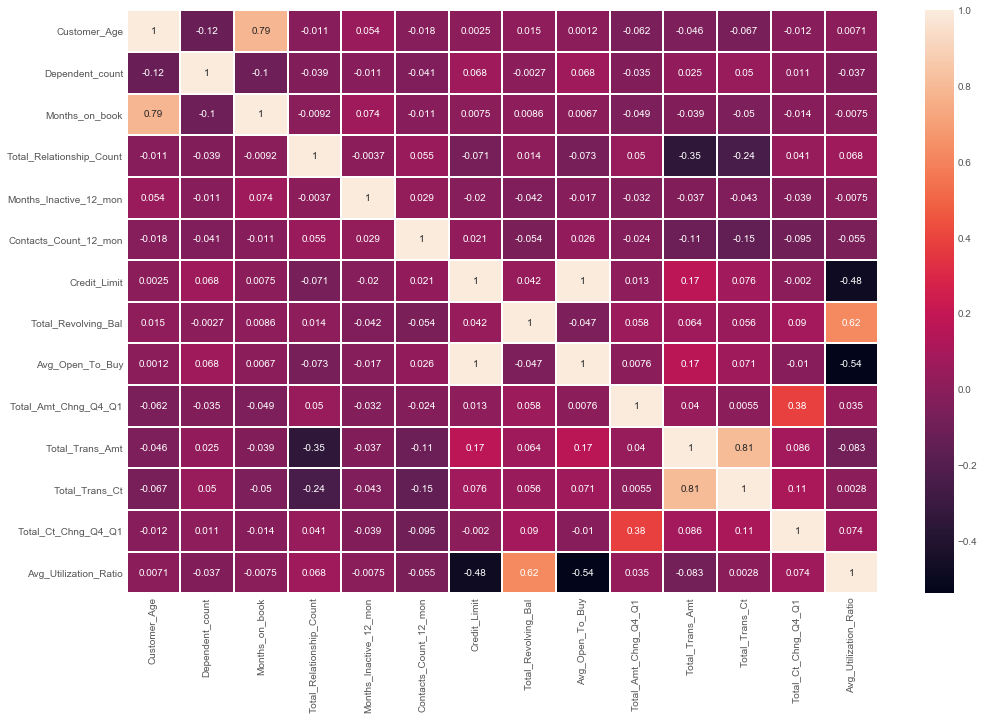

In [281]:
# Checking for Correlations 
j=dataset.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(j, annot=True, linewidths=1, ax=ax)

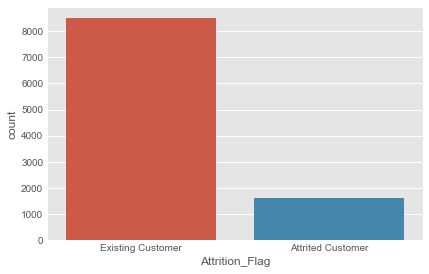

In [282]:
# Counting Target Calues
sns.countplot(dataset["Attrition_Flag"])
print()

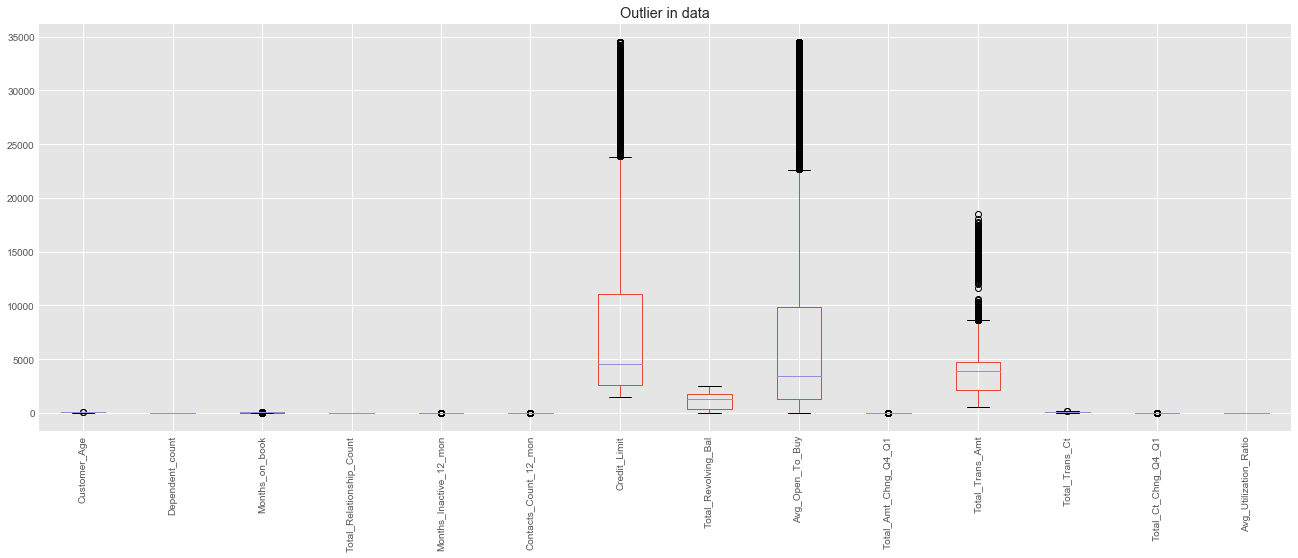

In [283]:
# Detecting the Outliers
plt.style.use('ggplot')
outlier= dataset.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=90);
plt.title('Outlier in data');

### Preparing Data for Machine Learning

### Editing Categorical Variables

In [284]:
cat_col = (["Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"])
dataset = pd.get_dummies(dataset, columns = cat_col)

In [285]:
dataset.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [286]:
dataset.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag_Attrited Customer',
       'Attrition_Flag_Existing Customer', 'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown', 'Card_Category_Blue',
       'Card_Ca

In [287]:
dataset = dataset.drop(["Attrition_Flag_Existing Customer","Gender_M",
                        "Education_Level_Unknown","Marital_Status_Unknown",
                        "Income_Category_Unknown","Card_Category_Silver"],axis = 1)

In [288]:
dataset.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag_Attrited Customer',
       'Gender_F', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum'],
      dtype='object')

In [289]:
dataset.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Married,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1,0,0,0,1,0,0,1,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,1,0,0,0,0,1,1,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,1,0,0,0,0,1,0,1,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,0,1,1,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,1,0,0,0,1,0,0,1,0,0


### Treating With the Outliers

In [290]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [291]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']

In [292]:
for i in dataset[outlier_list]:
    dataset[i]=treat_outlier(dataset[i])

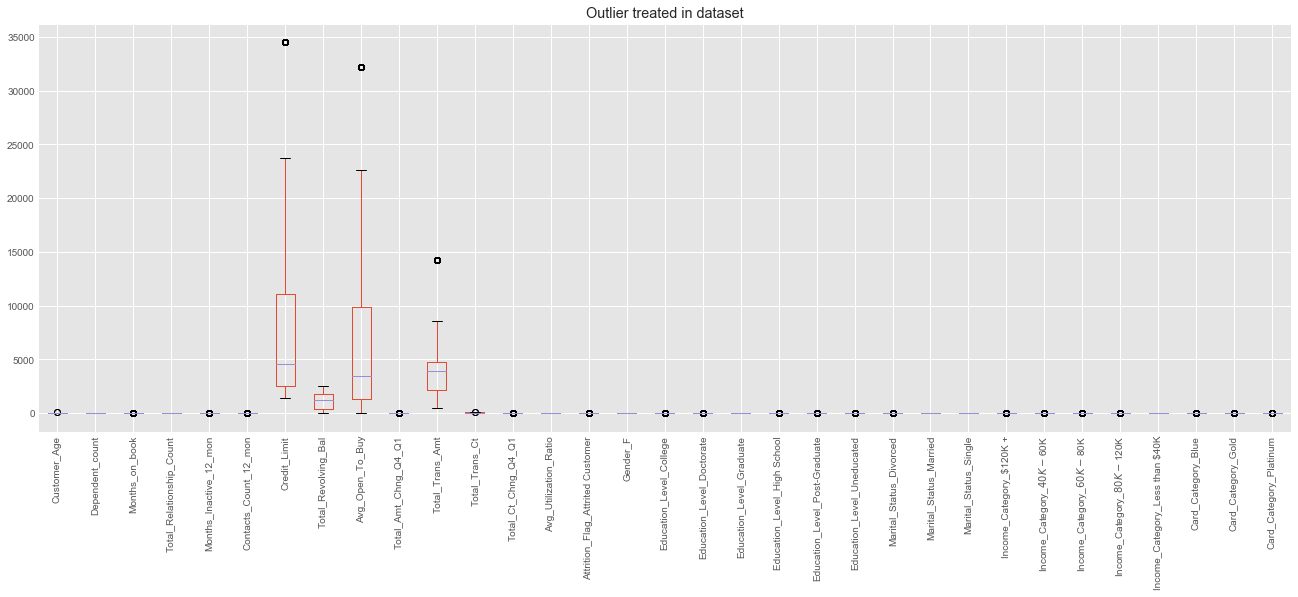

In [293]:
plt.style.use('ggplot')
outlier= dataset.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=90);
plt.title('Outlier treated in dataset');

In [294]:
### Splitting data and equalization the target's values

In [295]:
dataset = dataset.rename(columns = {"Attrition_Flag_Attrited Customer":"target"})

In [296]:
X = dataset.drop(["target"], axis=1)
Y = dataset["target"]

In [297]:
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

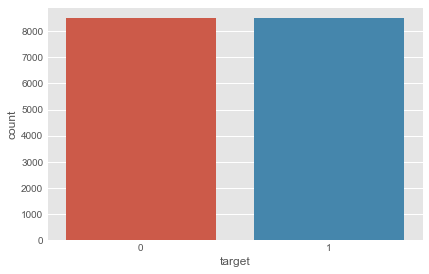

In [298]:
sns.countplot(Y)
print()

### Preparing Training and Test Data

In [299]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,
                                                test_size=0.25,
                                                random_state=42)

### Standization

In [300]:
rs = RobustScaler()
x_train_std = rs.fit_transform(x_train)
x_test_std = rs.fit_transform (x_test)

### Listing Machine Learning Algorithms and Their Names For Our 'for' Loop

In [301]:
dtc = DecisionTreeClassifier()
svm = SVC()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

names = ["Decision Tree","SVM","Random Forest","Ada Boost"]
classifiers= [dtc, svm, rfc, ada]

### Our Loop for Machine Learning Models and  Results

In [302]:
for name, clf in zip(names, classifiers):
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        y_pred = clf.predict(x_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(x_train, y_train)
        print("{}: train set score {}".format(name, score_train))
        recall = recall_score(y_test, y_pred)
        print("{}: recall score {}".format(name, recall))
        print()

Decision Tree: test set score: 0.9451764705882353
Decision Tree: train set score 1.0
Decision Tree: recall score 0.9490325625294951

SVM: test set score: 0.7376470588235294
SVM: train set score 0.7475294117647059
SVM: recall score 0.7597923548843795

Random Forest: test set score: 0.9778823529411764
Random Forest: train set score 1.0
Random Forest: recall score 0.9797074091552619

Ada Boost: test set score: 0.9604705882352941
Ada Boost: train set score 0.9630588235294117
Ada Boost: recall score 0.9641340254837187



### Combining Machine Learnings Results 

In [303]:
voting = VotingClassifier(estimators =[("svc",svm),("dt",dtc),("rf",rfc),("ada",ada)])

In [304]:
voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)
acc = accuracy_score(y_pred, y_test)
print("Accuracy Score",acc)

Accuracy Score 0.9682352941176471


### Evaluate the Results

In [305]:
print('ROC eğrisindeki alanı:',roc_auc_score(y_test, y_pred))
print('cohen kappa test', cohen_kappa_score(y_test, y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("f1 score",f1_score(y_pred, y_test))


ROC eğrisindeki alanı: 0.9682051444451655
cohen kappa test 0.9364662828916407
Precision: 0.9783027965284474
f1 score 0.9678034819937991


test


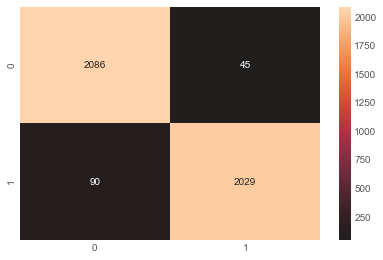

In [306]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,center=True,annot=True,fmt='d')
print('test')

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2131
           1       0.98      0.96      0.97      2119

    accuracy                           0.97      4250
   macro avg       0.97      0.97      0.97      4250
weighted avg       0.97      0.97      0.97      4250

